In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/adult.csv')

In [5]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.isna().sum().sum()

0

In [8]:
df.duplicated().sum()

52

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['income'] = df['income'].map({'<=50K':0,'>50K':1})

In [11]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


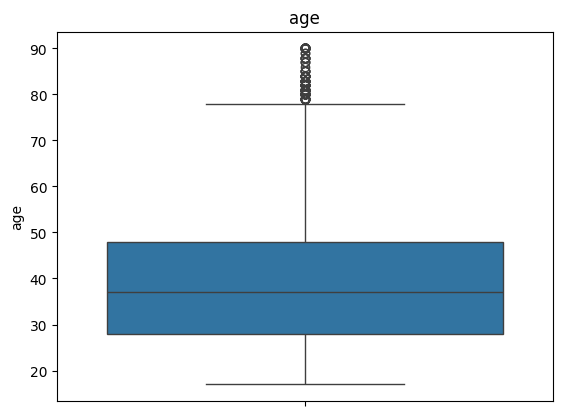

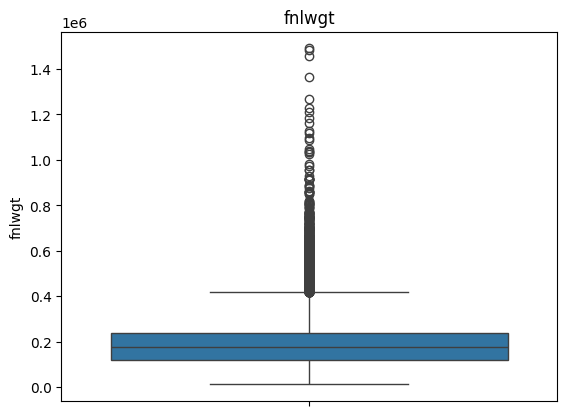

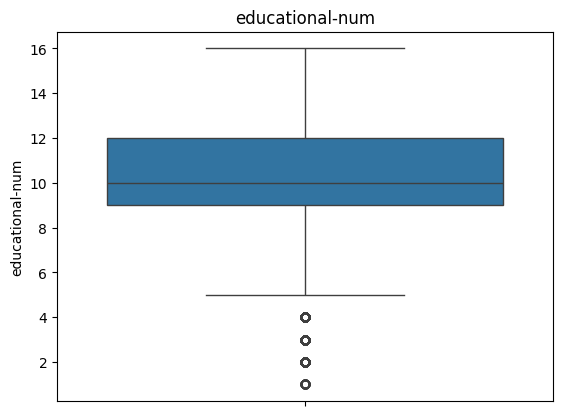

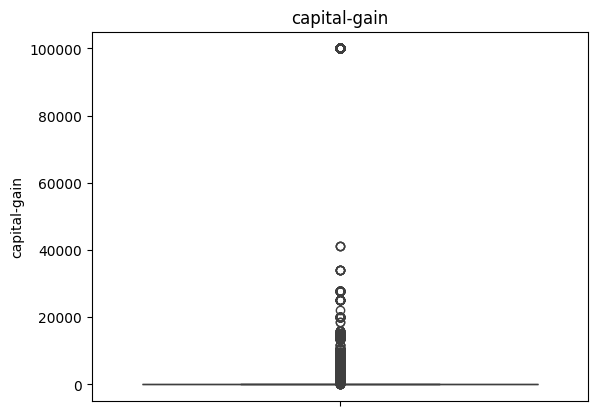

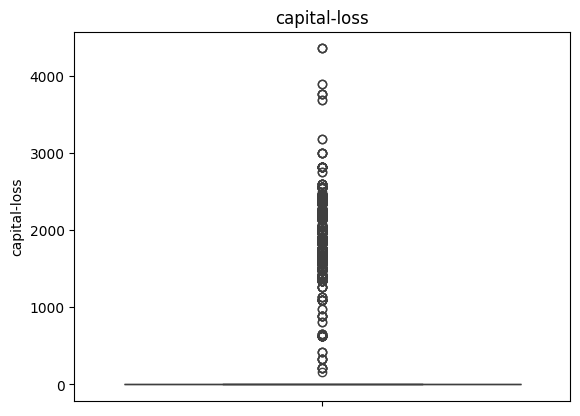

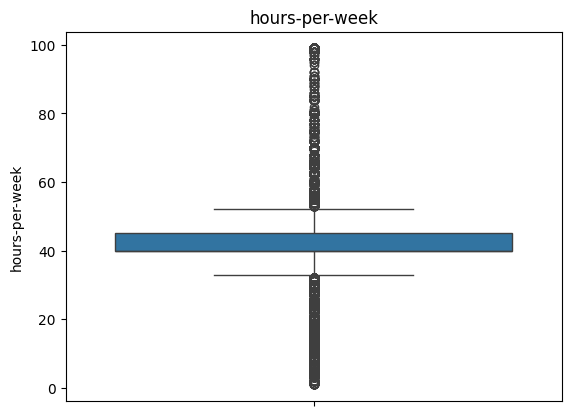

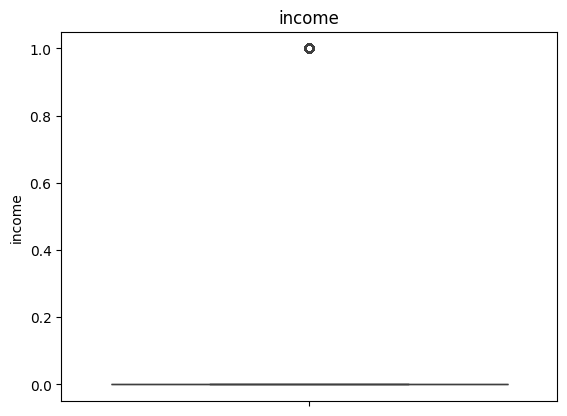

In [12]:
for col in df.columns:
  if df[col].dtype != 'object':
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [13]:
out_col = ['age','fnlwgt','capital-gain','capital-loss','hours-per-week']

In [14]:
for col in out_col:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  lower = q1-1.5*iqr
  upper = q3+1.5*iqr
  df = df[(df[col]>=lower) & (df[col]<=upper)]

In [15]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,0
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1


In [16]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,29613.000000,29613.000000,29613.000000,29613.0,29613.0,29613.00000,29613.000000
mean,38.305879,181241.564752,9.990207,0.0,0.0,41.44342,0.204606
std,12.221573,87328.368955,2.487733,0.0,0.0,3.94661,0.403420
min,17.000000,13769.000000,1.000000,0.0,0.0,33.00000,0.000000
25%,28.000000,117222.000000,9.000000,0.0,0.0,40.00000,0.000000
50%,37.000000,177083.000000,10.000000,0.0,0.0,40.00000,0.000000
75%,47.000000,230961.000000,12.000000,0.0,0.0,40.00000,0.000000
max,78.000000,417668.000000,16.000000,0.0,0.0,52.00000,1.000000


In [17]:
greater50k = df[df['income'] == 1]

<Axes: xlabel='income,native-country'>

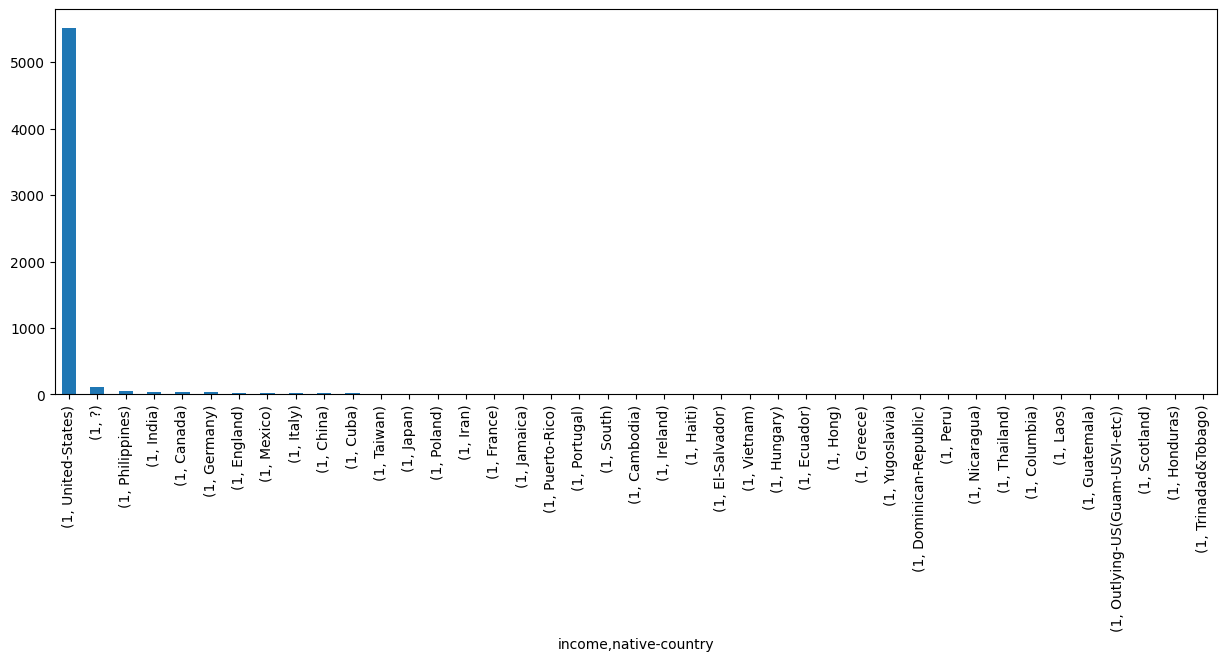

In [18]:
plt.figure(figsize = (15,5))
greater50k.groupby('income')['native-country'].value_counts().plot(kind = 'bar')

In [19]:
less50k = df[df['income'] == 0]

<Axes: xlabel='income,native-country'>

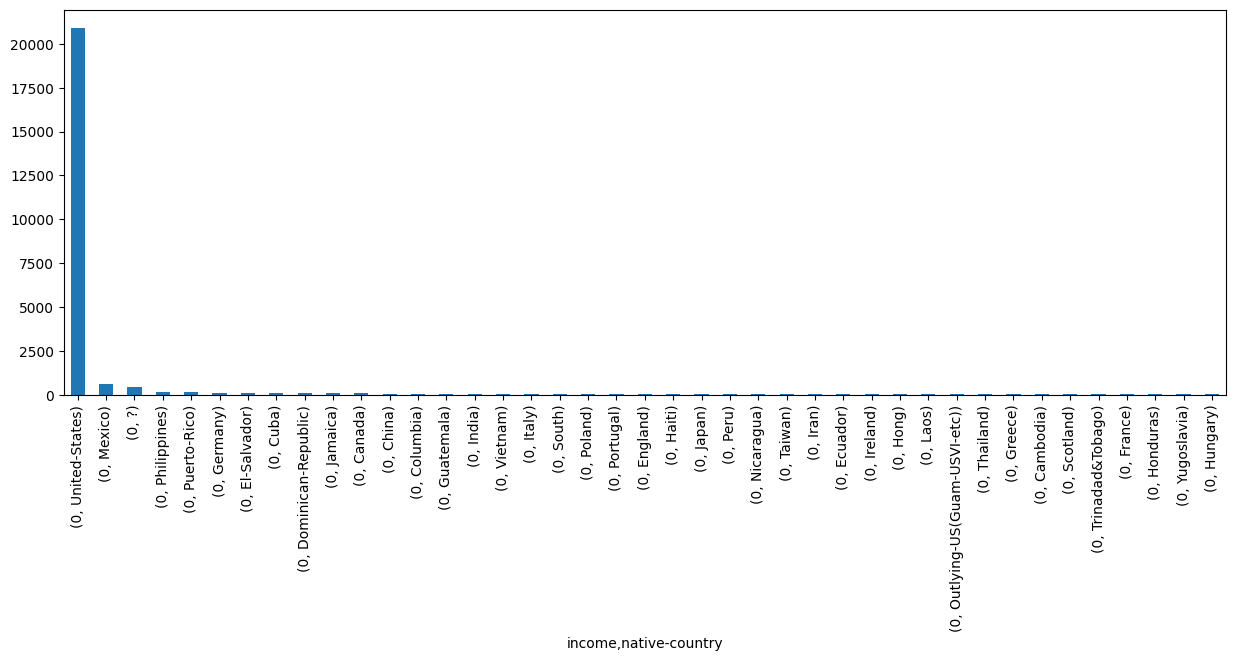

In [20]:
plt.figure(figsize = (15,5))
less50k.groupby('income')['native-country'].value_counts().plot(kind = 'bar')

<Axes: xlabel='workclass'>

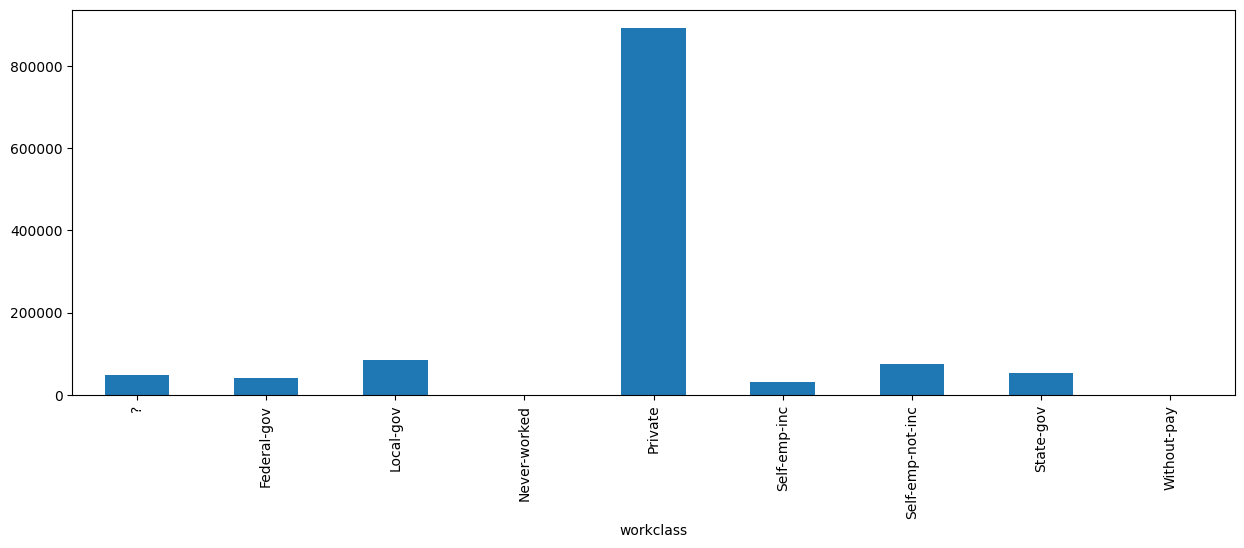

In [21]:
plt.figure(figsize = (15,5))
df.groupby('workclass')['hours-per-week'].sum().plot(kind = 'bar')

In [22]:
df.groupby('workclass')['hours-per-week'].value_counts().reset_index().sort_values(by = 'hours-per-week',ascending = False)

,workclass,hours-per-week,count
101,Self-emp-not-inc,52,7
29,Federal-gov,52,4
67,Private,52,121
43,Local-gov,52,17
83,Self-emp-inc,52,5
...,...,...,...
17,?,33,1
90,Self-emp-inc,33,1
46,Local-gov,33,10
71,Private,33,38


In [23]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,0
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1


In [22]:
!pip install pycaret

In [23]:
from pycaret.classification import *
df = pd.read_csv('/content/adult.csv')

In [24]:
clf_setup  = setup(data = df, target = 'income')

,Description,Value
0,Session id,3535
1,Target,income
2,Target type,Binary
3,Target mapping,"<=50K: 0, >50K: 1"
4,Original data shape,"(48842, 15)"
5,Transformed data shape,"(48842, 67)"
6,Transformed train set shape,"(34189, 67)"
7,Transformed test set shape,"(14653, 67)"
8,Numeric features,6
9,Categorical features,8


In [25]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8733,0.9278,0.8733,0.8688,0.8693,0.6314,0.6355,4.0530
xgboost,Extreme Gradient Boosting,0.8694,0.9260,0.8694,0.8648,0.8656,0.6216,0.6252,1.6890
gbc,Gradient Boosting Classifier,0.8673,0.9209,0.8673,0.8621,0.8608,0.6035,0.6123,7.1700
ada,Ada Boost Classifier,0.8627,0.9160,0.8627,0.8569,0.8568,0.5932,0.6001,2.7810
rf,Random Forest Classifier,0.8548,0.9029,0.8548,0.8492,0.8504,0.5788,0.5823,6.3310
lr,Logistic Regression,0.8430,0.8810,0.8430,0.8349,0.8354,0.5315,0.5390,11.6850
lda,Linear Discriminant Analysis,0.8404,0.8923,0.8404,0.8322,0.8331,0.5253,0.5322,1.2370
ridge,Ridge Classifier,0.8381,0.8923,0.8381,0.8291,0.8257,0.4970,0.5135,0.8330
et,Extra Trees Classifier,0.8351,0.8788,0.8351,0.8299,0.8318,0.5296,0.5312,8.0360
dt,Decision Tree Classifier,0.8180,0.7536,0.8180,0.8193,0.8186,0.5035,0.5036,1.1780


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

In [26]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
6,29,0,227026,11,9,4,0,4,2,1,0,0,40,38,0
8,24,4,369667,15,10,4,8,4,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,53,4,321865,12,14,2,4,0,4,1,0,0,40,38,1
48836,22,4,310152,15,10,4,11,1,4,1,0,0,40,38,0
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,38,0
48838,40,4,154374,11,9,2,7,0,4,1,0,0,40,38,1


In [27]:
x = df.iloc[:,:-1]
y = df['income']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [31]:
y_predict = model.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_predict)*100

83.26861387810231

In [34]:
n_estimators = np.arange(10, 100, 10)
for i in n_estimators:
  model = RandomForestClassifier(n_estimators = i,random_state = 42)
  model.fit(x_train,y_train)
  y_predict = model.predict(x_test)
  acc_sco = accuracy_score(y_test,y_predict)*100
  print(f'n_estimators = {i} and accuracy_score = {acc_sco}')


n_estimators = 10 and accuracy_score = 82.74523045753841
n_estimators = 20 and accuracy_score = 82.55951375991896
n_estimators = 30 and accuracy_score = 82.91406381901064
n_estimators = 40 and accuracy_score = 82.96471382745231
n_estimators = 50 and accuracy_score = 83.13354718892452
n_estimators = 60 and accuracy_score = 83.08289718048286
n_estimators = 70 and accuracy_score = 82.82964713827452
n_estimators = 80 and accuracy_score = 82.94783049130508
n_estimators = 90 and accuracy_score = 82.98159716359953


In [35]:
para_grid = {
    'n_estimators':[100,200,300,400],
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7],
    'max_features':['auto','sqrt','log2'],
    'max_leaf_nodes':[2,3,4,5,6]
}


In [ ]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(random_state = 42)
grid_search = GridSearchCV(estimator = model, param_grid = para_grid, cv = 5)
grid_search.fit(x_train,y_train)

In [37]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 100}


In [40]:
final_model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 5, max_features = 'sqrt', max_leaf_nodes = 6, random_state = 42)
final_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=6, random_state=42)

In [41]:
y_predict = final_model.predict(x_test)

In [42]:
accuracy_score(y_test,y_predict)*100

83.08289718048286